In [1]:
pip install pydotplus


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = 100
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [3]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = 100
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [4]:
df = pd.read_csv('data1.csv')

In [5]:
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.165523,-1.285566,0
1,1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,-0.264071,0.060346,0
2,2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.367189,-1.244781,1
3,3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,-0.751387,0.508983,0
4,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.193308,-1.244781,1


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
y = df['Churn']
X = df.drop('Churn',axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42, test_size=0.3)

In [9]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (4907, 18)
X_test (2103, 18)
y_train (4907,)
y_test (2103,)


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
decision_tree = DecisionTreeClassifier(criterion='gini',random_state=42)

In [12]:
desc_tree = decision_tree.fit(X_train,y_train)

#### Calculating performance measurement of train set

In [13]:
train_pred = desc_tree.predict(X_train)

In [14]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3589
           1       1.00      0.99      1.00      1318

    accuracy                           1.00      4907
   macro avg       1.00      1.00      1.00      4907
weighted avg       1.00      1.00      1.00      4907



#### Calculating pefermance measurement of test set

In [15]:
test_pred = desc_tree.predict(X_test)

In [16]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1564
           1       0.47      0.52      0.49       539

    accuracy                           0.72      2103
   macro avg       0.65      0.66      0.65      2103
weighted avg       0.73      0.72      0.73      2103



**Interpretation:**

We can observe that train accuracy is 100% and test is 0.72. Model is overfitting.

## Hyperparameter tuning using GridsearchCV

In [17]:
tuned_parameter = [{'criterion':['gini','entropy'],
                   'max_depth':range(10,20),
                   'max_features':['sqrt','log2']
                  }]

In [20]:
from sklearn.model_selection import KFold

In [21]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

In [22]:
DT = DecisionTreeClassifier(random_state=42)

In [23]:
gr_model = GridSearchCV(estimator=DT,param_grid=tuned_parameter,cv=kf)

In [24]:
tree_grid_model = gr_model.fit(X_train,y_train)
print('Best parameters for decision tree classifier are: ', tree_grid_model.best_params_)

Best parameters for decision tree classifier are:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}


In [25]:
final_model = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features='sqrt',random_state=42)

In [26]:
dt_model = final_model.fit(X_train,y_train)

#### Performance measure for train set

In [27]:
y_pred = dt_model.predict(X_train)

In [28]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3589
           1       0.75      0.69      0.72      1318

    accuracy                           0.86      4907
   macro avg       0.82      0.80      0.81      4907
weighted avg       0.85      0.86      0.85      4907



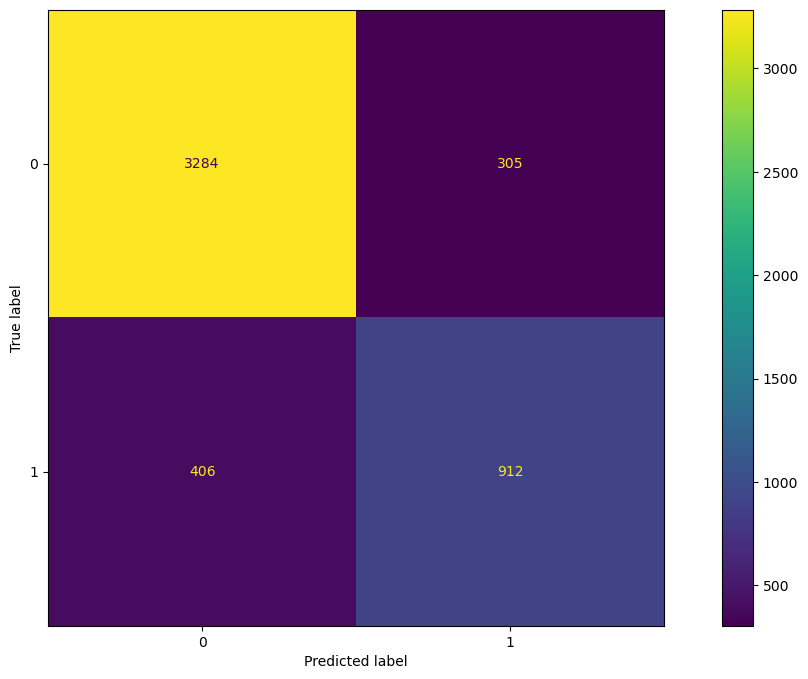

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train,y_pred)

#### Performance measure on test set

In [30]:
y_test_pred = dt_model.predict(X_test)

In [31]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1564
           1       0.54      0.57      0.55       539

    accuracy                           0.76      2103
   macro avg       0.69      0.70      0.70      2103
weighted avg       0.77      0.76      0.77      2103



In [33]:
print(roc_auc_score(y_test,y_test_pred))

0.6994914566617161
